In [114]:
import os.path
import numpy as np
import pandas as pd
%matplotlib inline

In [115]:
RQ1 = pd.read_csv('../../data/analysis/RQ1.csv', header=[0,1])

In [116]:
RQ1.drop(RQ1.columns[[0]], axis=1, inplace=True)

In [117]:
RQ1.head()

Players                 club                    league  \
  Unnamed: 1_level_1   Unnamed: 2_level_1        Unnamed: 3_level_1   
0    Aaron Cresswell      West Ham United    English Premier League   
1       Aaron Hughes  Heart of Midlothian      Scottish Premiership   
2         Aaron Hunt         Hamburger SV         German Bundesliga   
3       Aaron Lennon              Everton    English Premier League   
4   Aaron Leya Iseka     SV Zulte-Waregem  Belgian First Division A   

                 age        nationality           Position            overall  \
  Unnamed: 4_level_1 Unnamed: 5_level_1 Unnamed: 6_level_1 Unnamed: 7_level_1   
0                 27            England           Defender                 76   
1                 37   Northern Ireland           Defender                 71   
2                 30            Germany         Midfielder                 76   
3                 30            England         Midfielder                 77   
4                 19            Belgium            Forward                 68   

           potential          eur_value  injury_prone_trait     16/17        \
  Unnamed: 8_level_1 Unnamed: 9_level_1 Unnamed: 10_level_1      Form  Apps   
0                 77          7000000.0               False  2.269231  26.0   
1                 71           325000.0                True  0.000000   0.0   
2                 76          7500000.0                True  2.590909  22.0   
3                 77          8500000.0               False  1.818182  11.0   
4                 79          1500000.0               False  2.125000   8.0   

      15/16           14/15           13/14           12/13        
       Form  Apps      Form  Apps      Form  Apps      Form  Apps  
0  3.108108  37.0  2.921053  38.0  0.000000   0.0  0.000000   0.0  
1  0.000000   0.0  0.000000   0.0  0.461538  13.0  1.625000  24.0  
2  2.136364  22.0  1.800000  15.0  3.741935  31.0  4.035714  28.0  
3  2.760000  25.0  2.217391  23.0  2.555556  27.0  3.147059  34.0  
4  0.000000   0.0  0.000000   0.0  0.000000   0.0  0.000000   0.0

In [118]:
RQ1 = RQ1.loc[~((RQ1['16/17']['Apps'] == 0) & (RQ1['15/16']['Apps'] == 0) & (RQ1['14/15']['Apps'] == 0) & (RQ1['13/14']['Apps'] == 0) & (RQ1['12/13']['Apps'] == 0))]

In [119]:
RQ1['count1'] = 0
RQ1.loc[RQ1['16/17']['Apps']>9.0, 'count1'] = 1
RQ1['count2'] = 0
RQ1.loc[RQ1['15/16']['Apps']>9.0, 'count2'] = 1
RQ1['count3'] = 0
RQ1.loc[RQ1['14/15']['Apps']>9.0, 'count3'] = 1
RQ1['count4'] = 0
RQ1.loc[RQ1['13/14']['Apps']>9.0, 'count4'] = 1
RQ1['count5'] = 0
RQ1.loc[RQ1['12/13']['Apps']>9.0, 'count5'] = 1

RQ1['Seasons Played'] = RQ1['count1'] + RQ1['count2'] + RQ1['count3'] + RQ1['count4'] + RQ1['count5']

In [120]:
RQ1.drop(RQ1.columns[[20,21,22,23,24]], axis=1, inplace=True)

In [121]:
RQ1 = RQ1[RQ1['Seasons Played']>1]

In [122]:
RQ1

Players                       club                    league  \
      Unnamed: 1_level_1         Unnamed: 2_level_1        Unnamed: 3_level_1   
0        Aaron Cresswell            West Ham United    English Premier League   
1           Aaron Hughes        Heart of Midlothian      Scottish Premiership   
2             Aaron Hunt               Hamburger SV         German Bundesliga   
3           Aaron Lennon                    Everton    English Premier League   
5           Aaron Niguez                Real Oviedo  Spanish Segunda Division   
7           Aaron Ramsey                    Arsenal    English Premier League   
12         Abdoul Camara       En Avant de Guingamp            French Ligue 1   
13        Abdoul Sissoko       Akhisar Belediyespor         Turkish Super Lig   
17    Abdoulaye Doucoure                    Watford    English Premier League   
22          Abel Aguilar  Asociacion Deportivo Cali       Colombian Primera A   
23        Abel Hernandez                  Hull City      English Championship   
26         Achraf Lazaar           Benevento Calcio           Italian Serie A   
35          Adam Hlousek             Legia Warszawa        Polish Ekstraklasa   
37          Adam Lallana                  Liverpool    English Premier League   
40           Adam Masina                    Bologna           Italian Serie A   
44            Adam Ounas                     Napoli           Italian Serie A   
47            Adam Smith                Bournemouth    English Premier League   
49           Adam Szalai        TSG 1899 Hoffenheim         German Bundesliga   
54          Adama Traore                  AS Monaco            French Ligue 1   
55          Adel Taarabt                      Genoa           Italian Serie A   
56           Adem Ljajic                     Torino           Italian Serie A   
59             Adil Rami     Olympique de Marseille            French Ligue 1   
60      Adlene Guedioura              Middlesbrough      English Championship   
61         Admir Mehmedi        Bayer 04 Leverkusen         German Bundesliga   
62         Adnan Januzaj              Real Sociedad  Spanish Primera Division   
65       Adrian Gonzalez                  Malaga CF  Spanish Primera Division   
66          Adrian Lopez               RCD Espanyol  Spanish Primera Division   
67       Adrian Mariappa                    Watford    English Premier League   
69          Adrian Ramos                 Granada CF  Spanish Segunda Division   
70         Adrian Stoian                    Crotone           Italian Serie A   
...                  ...                        ...                       ...   
3867      Yassine Benzia                 LOSC Lille            French Ligue 1   
3872          Yaya Toure            Manchester City    English Premier League   
3876  Yevhen Konoplyanka              FC Schalke 04         German Bundesliga   
3878      Yoan Cardinale                   OGC Nice            French Ligue 1   
3879       Yoan Gouffran                    Goztepe         Turkish Super Lig   
3881        Yoann Andreu                 Angers SCO            French Ligue 1   
3883      Yoann Gourcuff           Stade Rennais FC            French Ligue 1   
3885    Yohan Benalouane             Leicester City    English Premier League   
3886        Yohan Cabaye             Crystal Palace    English Premier League   
3887         Yohan Mollo                     Fulham      English Championship   
3889         Yohann Pele     Olympique de Marseille            French Ligue 1   
3890      Yoshinori Muto            1. FSV Mainz 05         German Bundesliga   
3891     Younes Belhanda             Galatasaray SK         Turkish Super Lig   
3892       Younes Kaboul                    Watford    English Premier League   
3893  Younousse Sankhare      Girondins de Bordeaux            French Ligue 1   
3899     Youssouf Sabaly      Girondins de Bordeaux            French Ligue 1   
3902       Yuto Nagatomo                      In

RQ2 = df[(df['count']>1) & (df['17/18']['Apps']>4.0)]

In [123]:
OverallForm = RQ1['16/17']['Form'] + RQ1['15/16']['Form'] + RQ1['14/15']['Form'] + RQ1['13/14']['Form'] + RQ1['12/13']['Form']

In [124]:
RQ1['Average Form'] = OverallForm/RQ1['Seasons Played']

In [125]:
RQ1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1791 entries, 0 to 3921
Data columns (total 22 columns):
(Players, Unnamed: 1_level_1)                1791 non-null object
(club, Unnamed: 2_level_1)                   1791 non-null object
(league, Unnamed: 3_level_1)                 1791 non-null object
(age, Unnamed: 4_level_1)                    1791 non-null int64
(nationality, Unnamed: 5_level_1)            1791 non-null object
(Position, Unnamed: 6_level_1)               1791 non-null object
(overall, Unnamed: 7_level_1)                1791 non-null int64
(potential, Unnamed: 8_level_1)              1791 non-null int64
(eur_value, Unnamed: 9_level_1)              1791 non-null float64
(injury_prone_trait, Unnamed: 10_level_1)    1791 non-null bool
(16/17, Form)                                1791 non-null float64
(16/17, Apps)                                1791 non-null float64
(15/16, Form)                                1791 non-null float64
(15/16, Apps)                       

In [126]:
RQ1.drop(RQ1.columns[[10,11,12,13,14,15,16,17,18,19]], axis=1, inplace=True)

In [127]:
RQ1 = RQ1[~(RQ1['Average Form'] < 0)]

In [128]:
RQ1.head()

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Seasons Played,Average Form
,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1,Unnamed: 6_level_1,Unnamed: 7_level_1,Unnamed: 8_level_1,Unnamed: 9_level_1,Unnamed: 10_level_1,,
0,Aaron Cresswell,West Ham United,English Premier League,27,England,Defender,76,77,7000000.0,False,3,2.766131
1,Aaron Hughes,Heart of Midlothian,Scottish Premiership,37,Northern Ireland,Defender,71,71,325000.0,True,2,1.043269
2,Aaron Hunt,Hamburger SV,German Bundesliga,30,Germany,Midfielder,76,76,7500000.0,True,5,2.860984
3,Aaron Lennon,Everton,English Premier League,30,England,Midfielder,77,77,8500000.0,False,5,2.499638
5,Aaron Niguez,Real Oviedo,Spanish Segunda Division,28,Spain,Midfielder,73,73,4000000.0,False,2,1.511905


In [129]:
RQ1.columns = [col[0] for col in RQ1.columns]

In [130]:
RQ1

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Seasons Played,Average Form
0,Aaron Cresswell,West Ham United,English Premier League,27,England,Defender,76,77,7000000.0,False,3,2.766131
1,Aaron Hughes,Heart of Midlothian,Scottish Premiership,37,Northern Ireland,Defender,71,71,325000.0,True,2,1.043269
2,Aaron Hunt,Hamburger SV,German Bundesliga,30,Germany,Midfielder,76,76,7500000.0,True,5,2.860984
3,Aaron Lennon,Everton,English Premier League,30,England,Midfielder,77,77,8500000.0,False,5,2.499638
5,Aaron Niguez,Real Oviedo,Spanish Segunda Division,28,Spain,Midfielder,73,73,4000000.0,False,2,1.511905
7,Aaron Ramsey,Arsenal,English Premier League,26,Wales,Midfielder,82,83,25500000.0,True,5,3.060384
12,Abdoul Camara,En Avant de Guingamp,French Ligue 1,27,Guinea,Midfielder,71,71,2500000.0,False,3,1.800654
13,Abdoul Sissoko,Akhisar Belediyespor,Turkish Super Lig,27,Mali,Midfielder,70,70,1500000.0,False,2,1.800983
17,Abdoulaye Doucoure,Watford,English Premier League,24,France,Midfielder,78,84,12000000.0,False,4,3.407292
22,Abel Aguilar,Asociacion Deportivo Cali,Colombian Primera A,32,Colombia,Midfielder,75,75,3800000.0,True,3,2.015873


In [131]:
RQ1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1789 entries, 0 to 3921
Data columns (total 12 columns):
Players               1789 non-null object
club                  1789 non-null object
league                1789 non-null object
age                   1789 non-null int64
nationality           1789 non-null object
Position              1789 non-null object
overall               1789 non-null int64
potential             1789 non-null int64
eur_value             1789 non-null float64
injury_prone_trait    1789 non-null bool
Seasons Played        1789 non-null int64
Average Form          1789 non-null float64
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 169.5+ KB


In [132]:
RQ1.groupby(['overall']).mean()['Average Form']

overall
62    2.100000
63    2.107489
64    2.459479
65    2.229616
66    2.129176
67    2.273142
68    2.211771
69    2.222729
70    2.232646
71    2.232698
72    2.194846
73    2.404956
74    2.472625
75    2.475284
76    2.513703
77    2.668423
78    2.742464
79    2.821111
80    3.005877
81    2.913519
82    3.048862
83    3.114881
84    3.336168
85    3.382908
86    4.180737
87    3.436466
88    4.264680
89    4.193983
90    3.813310
91    6.043066
92    5.455542
93    8.232795
94    7.879095
Name: Average Form, dtype: float64

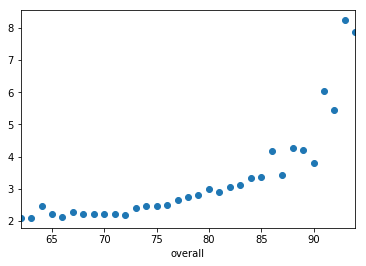

In [139]:
x = RQ1.groupby(['overall']).mean()['Average Form']
x.plot(style=['o','rx'])

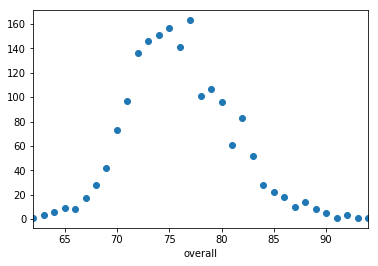

In [134]:
y = RQ1.groupby(['overall']).count()['Players']
y.plot(style=['o','rx'])

In [135]:
RQ1['Average Form'].max()

10.606249999999999

In [136]:
RQ1[RQ1['Average Form'] < 0]

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Seasons Played,Average Form
